# Algoritmos de optimización - Reto 1

Nombre: RAÚL MURILLO GALLEGO<br>
Github: [Repositorio de la actividad](https://github.com/RaulMGallego/03MAIR-Algoritmos-de-Optimizacion-2024/blob/main/ALGORITMOS_R1/Algoritmos_R1_Raul_MurilloGallego.ipynb)<br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás. 

In [37]:
# Solución problema Torres de Hanoi utilizando la técnica de divide y vencerás.
# En esta ocasión utilizamos un procedimiento recursivo
def torres_hanoi(n, origen, destino, auxiliar):
    if n == 1:
        print(f"Mueve el disco 1 de {origen} a {destino}")
    else:
        # Mueve n-1 discos de la varilla de origen a la varilla auxiliar
        hanoi(n-1, origen, auxiliar, destino)
        
        # Mueve el disco más grande de la varilla de origen a la varilla de destino
        print(f"Mueve el disco {n} de {origen} a {destino}")
        
        # Mueve los n-1 discos de la varilla auxiliar a la varilla de destino
        hanoi(n-1, auxiliar, destino, origen)

# Ejemplo de uso
print(f"Ejemplo para 3 discos")
n = 3  # Número de discos (3)
torres_hanoi(n, 'A', 'C', 'B')
print(f"")
print(f"Ejemplo para 4 discos")
n = 4  # Número de discos (4)
torres_hanoi(n, 'A', 'C', 'B')



Ejemplo para 3 discos
Mueve el disco 1 de A a C
Mueve el disco 2 de A a B
Mueve el disco 1 de C a B
Mueve el disco 3 de A a C
Mueve el disco 1 de B a A
Mueve el disco 2 de B a C
Mueve el disco 1 de A a C

Ejemplo para 4 discos
Mueve el disco 1 de A a B
Mueve el disco 2 de A a C
Mueve el disco 1 de B a C
Mueve el disco 3 de A a B
Mueve el disco 1 de C a A
Mueve el disco 2 de C a B
Mueve el disco 1 de A a B
Mueve el disco 4 de A a C
Mueve el disco 1 de B a C
Mueve el disco 2 de B a A
Mueve el disco 1 de C a A
Mueve el disco 3 de B a C
Mueve el disco 1 de A a B
Mueve el disco 2 de A a C
Mueve el disco 1 de B a C


## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos. 

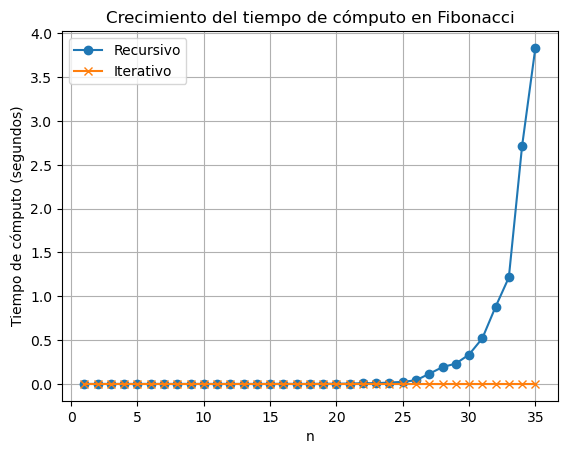

In [7]:
#Sucesión_de_Fibonacci
def fibonacci_recursivo(n):
    if n <= 1:
        return n
    else:
        return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)

def fibonacci_iterativo(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b

import time
import matplotlib.pyplot as plt

# Función para medir el tiempo de ejecución
def medir_tiempo(func, n):
    inicio = time.time()
    func(n)
    fin = time.time()
    return fin - inicio

# Valores de n para probar
valores_n = range(1, 36)

# Medir tiempos para el algoritmo recursivo
tiempos_recursivo = [medir_tiempo(fibonacci_recursivo, n) for n in valores_n]

# Medir tiempos para el algoritmo iterativo
tiempos_iterativo = [medir_tiempo(fibonacci_iterativo, n) for n in valores_n]

# Graficar los resultados
plt.plot(valores_n, tiempos_recursivo, label="Recursivo", marker='o')
plt.plot(valores_n, tiempos_iterativo, label="Iterativo", marker='x')
plt.xlabel("n")
plt.ylabel("Tiempo de cómputo (segundos)")
plt.title("Crecimiento del tiempo de cómputo en Fibonacci")
plt.legend()
plt.grid(True)
plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [45]:
# Problema del cambio de moneda
def cambio_monedas(cantidad, monedas):
    # Ordenar las monedas de mayor a menor
    monedas.sort(reverse=True)
    
    # Lista para almacenar el número de monedas de cada tipo
    resultado = []
    
    for moneda in monedas:
        # Calcular cuántas monedas de este tipo se pueden usar
        num_monedas = cantidad // moneda
        resultado.append((moneda, num_monedas))
        
        # Actualizar la cantidad restante
        cantidad -= num_monedas * moneda
        
        # Si ya no queda cantidad, terminar
        if cantidad == 0:
            break
    
    # Si no se pudo devolver el cambio exacto
    if cantidad != 0:
        return "No es posible devolver el cambio exacto con las monedas dadas."
    
    return resultado

# Ejemplo de uso
monedas = [1, 2, 5, 10, 20, 50]  # Denominaciones de monedas
cantidad = 89  # Cantidad a devolver
resultado = cambio_monedas(cantidad, monedas)
print(f"Ejemplo para una cantidad de " + str(cantidad))
print(resultado)

cantidad = 123  # Cantidad a devolver
resultado = cambio_monedas(cantidad, monedas)
print(f"")
print(f"Ejemplo para una cantidad de " + str(cantidad))
print(resultado)

Ejemplo para una cantidad de 89
[(50, 1), (20, 1), (10, 1), (5, 1), (2, 2)]

Ejemplo para una cantidad de 123
[(50, 2), (20, 1), (10, 0), (5, 0), (2, 1), (1, 1)]


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [51]:
# Problema de las N-Reinas
def es_seguro(tablero, fila, columna, N):
    # Verificar si hay una reina en la misma columna
    for i in range(fila):
        if tablero[i][columna] == 1:
            return False
    
    # Verificar la diagonal superior izquierda
    i, j = fila, columna
    while i >= 0 and j >= 0:
        if tablero[i][j] == 1:
            return False
        i -= 1
        j -= 1
    
    # Verificar la diagonal superior derecha
    i, j = fila, columna
    while i >= 0 and j < N:
        if tablero[i][j] == 1:
            return False
        i -= 1
        j += 1
    
    return True

def resolver_n_reinas(tablero, fila, N):
    # Si todas las reinas están colocadas, retornar True
    if fila >= N:
        return True
    
    # Intentar colocar una reina en cada columna de la fila actual
    for columna in range(N):
        if es_seguro(tablero, fila, columna, N):
            tablero[fila][columna] = 1  # Colocar la reina
            
            # Recursión: intentar colocar las reinas en las filas restantes
            if resolver_n_reinas(tablero, fila + 1, N):
                return True
            
            # Si no se puede colocar, retroceder (backtrack)
            tablero[fila][columna] = 0
    
    # Si no se puede colocar la reina en ninguna columna de esta fila, retornar False
    return False

def imprimir_tablero(tablero, N):
    for fila in tablero:
        print(" ".join(str(celda) for celda in fila))

def n_reinas(N):
    # Crear un tablero vacío de N x N
    tablero = [[0] * N for _ in range(N)]
    
    # Resolver el problema
    if resolver_n_reinas(tablero, 0, N):
        imprimir_tablero(tablero, N)
    else:
        print(f"No existe solución para {N} reinas en un tablero de {N}x{N}.")

# Ejemplo de uso
N = 8  # Tamaño del tablero (8x8)
print(f"Tamaño del tablero: " + str(N))
n_reinas(N)

print(f"")
N = 10  # Tamaño del tablero (10x10)
print(f"Tamaño del tablero: " + str(N))
n_reinas(N)

Tamaño del tablero: 8
1 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 1
0 0 0 0 0 1 0 0
0 0 1 0 0 0 0 0
0 0 0 0 0 0 1 0
0 1 0 0 0 0 0 0
0 0 0 1 0 0 0 0

Tamaño del tablero: 10
1 0 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0
0 0 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 0 0 1
0 0 0 0 1 0 0 0 0 0
0 0 0 0 0 0 0 0 1 0
0 1 0 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 1 0 0 0
